<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 : 클래스, 함수, 데이터 등이 모여있다
!pip install pybithumb

     |████████████████████████████████| 51 kB 409 kB/s 
     |████████████████████████████████| 112 kB 9.7 MB/s 
     |████████████████████████████████| 251 kB 44.5 MB/s 


In [3]:
import pybithumb
btc = pybithumb.get_candlestick("BTC")  # 비트코인의 가격정보를 일자별로 정리(pandas - DataFrame : 2차원 데이터를 정리하는 자료구조)
xrp = pybithumb.get_candlestick("XRP")  # 종목2

In [4]:
# 여러 개 columns 중 종가(close)만을 출력하기
btc['close'].values # ndarray가 모여 2차원 자료구조인 dataframe을 구성

array([  755000.,   750000.,   739000., ..., 50321000., 49418000.,
       50884000.])

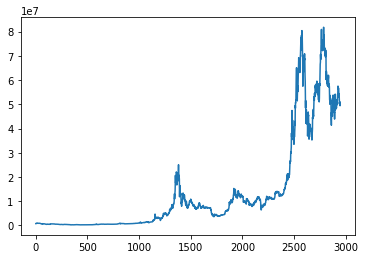

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(btc['close'].values)) 
plt.plot(x, btc['close'].values)  # (x,y) 값을 넣으면 line chart를 그리는 plot method

ValueError: ignored

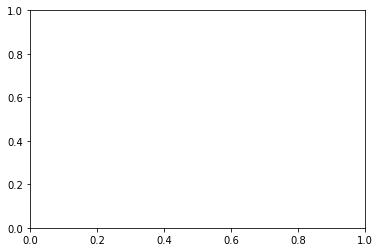

In [6]:
# btc['close'].values라고 쓰지 않아도 plt 라이브러리는 알아서 해석해줌. but, 둘의 사이즈가 다르다는 문제
plt.scatter(btc['close'], xrp['close']) # 산포도 그리기

In [7]:
len(btc['close'])

2946

In [8]:
len(xrp['close'])

1786

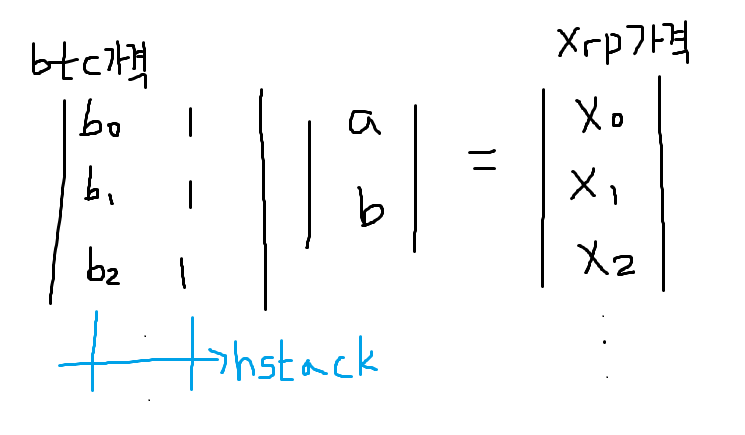

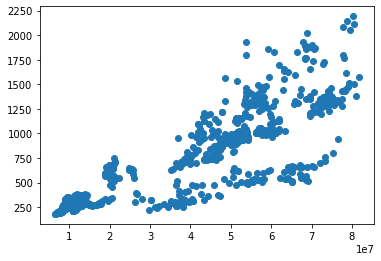

In [9]:
# 1000개만 슬라이싱해서 둘의 사이즈를 통일하기
# 양의 상관관계가 보임 -> regression : 이 상관관계를 가장 잘 표현하는 ax + b를 구하는 것
plt.scatter(btc['close'].values[-1000:], xrp['close'].values[-1000:])

In [10]:
print(1e10) # 1 * 10의 10제곱
print(1e7)  # 10의 7제곱

10000000000.0
10000000.0


In [11]:
# regression : ax + b로 모델링(비트코인의 가격으로 리플의 가격을 예측하기)
# a, b를 구하는 방법 = (비트코인 가격 column과 1로 채워진 column을 하나의 행렬로 만든 후 pseudo inverse) * (리플의 가격 행렬)
b = btc['close'].values[-1000:]
b0 = b.reshape(1000, 1)  # b0 = b.reshape(-1,1)도 OK
b0.shape

(1000, 1)

In [12]:
# 1로 구성된 ndarray 만들기
# [1] * 1000 # 리스트 안에 1000개의 1을 채운다
o = np.ones((1000,1), dtype=np.uint32)
o.shape

(1000, 1)

In [13]:
# ndarray b0와 o를 합쳐 하나의 행렬로 만들기
a = np.hstack((b0,o))  # horizontal(columns를 -> 방향으로 쌓는다)
a.shape 

(1000, 2)

In [16]:
# b 행렬 만들기
x = xrp['close'].values[-1000:].reshape(-1,1)
x.shape

(1000, 1)

In [17]:
print(np.linalg.pinv(a))   # inv는 정방행렬에 대한 역행렬을 구한다. (1000,2) 행렬이므로 pinv를 구해야 함
v = np.linalg.pinv(a) @ x            # [[a], [b]] = a의 역행렬 * x 행렬
a = v[0,0]
b = v[1,0] 

[[-3.90817941e-11 -3.96972212e-11 -3.95554865e-11 ...  3.31637503e-11
   3.14797180e-11  3.42137062e-11]
 [ 2.27164990e-03  2.29167477e-03  2.28706298e-03 ... -7.90876133e-05
  -2.42922914e-05 -1.13251253e-04]]


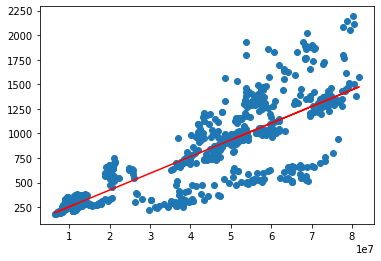

In [18]:
plt.scatter(btc['close'].values[-1000:], xrp['close'].values[-1000:])
x = btc['close'].values[-1000:]  # x는 비트코인의 가격
y = a*x + b
plt.plot(x, y, color = 'r')   

## 판다스 (Pandas) 라이브러리

Pandas는 데이터 분석을 위한 고수준의 자료구조(1치원 데이터를 관리하는 series, 2차원 데이터를 관리하는 DataFrame) 와 데이터 분석 도구를 제공합니다.  
- 여기서 고수준이란 사용자가 쉽게 데이터를 제어하고 시각화 할 수 있는 메서드를 의미합니다.

판다스는 데이터 분석분야 에서 필수적으로 사용되는 중요한 모듈입니다. 

<img src="https://i.ibb.co/Hh85f7j/series-0.png" width="600" height="400" style="float:left" />

그림출처  
https://plot.ly/pandas/2D-Histogram/  
https://plot.ly/pandas/histograms/

판다스에는 <b>시리즈(Series)</b>와 <b>데이터 프레임 (DataFrame)</b> 두 개의 자료구조를 사용합니다. 
- 1차원 데이터를 관리하는 `Series`
- 2차원 데이터를 관리하는 `DataFrame`

파이썬의 기본자료구조(리스트, 튜플, 딕셔너리)의 부족한 부분을 보완해 보다 고수준으로 만든 자료구조로 numpy의 `ndarray`가 있었습니다.  
ndarray는 수치 연산에 특화돼 있으며, 브로드캐스팅 기능으로 반복문을 사용하지 않고 `ndarray`의 모든 데이터에 연산 적용이 가능했었습니다.  판다스의 자료구조는 `ndarray`를 기반으로 행과 열에 이름을 붙여 가독성을 높이고 보다 범용적인 목적의 데이터를 관리해줍니다.

다양한 방식으로 import 할 수 있는데, 다음 세 가지 형태를 빈번하게 사용합니다. 

In [19]:
import pandas as pd
from pandas import Series  # prefix(모듈, 패키지 이름) 없이 사용하기 위헤
from pandas import DataFrame

### 시리즈 객체

리스트를 사용해서 시리즈 객체로 업그레이드 할 수 있습니다.  
정확히 이야기하면 시리즈 클래스는 생성자로 하나의 리스트를 입력받는 겁니다.  

In [20]:
from pandas import Series
import numpy as np

data = ["가", "나", "다"]
s = Series(data)  # series 객체: list를 넣어도 series는 시리즈 객체로 upgrade해줌
print(s)

0    가
1    나
2    다
dtype: object


In [21]:
data = np.array(["가", "나", "다"])
s = Series(data)  # series 객체: ndarray 넣어도 ok
print(s)

0    가
1    나
2    다
dtype: object


시리즈 객체는 자동으로 0 부터 시작하는  인덱스가 부여되며, 시리즈 객체를 출력해 보면 인덱스와 맵핑된 값이 한 로우에 표시됩니다. 또한 내부적으로 0부터 시작하는 행번호를 아래 그림과 같이 부여합니다. (행 번호의 쓰임새는 뒤에서 설명하겠습니다.) 즉, 시리즈는 입력된 데이터에 대해 행번호와 인덱스를 부여하고 출력하면 인덱스와 데이터만 표시되는 겁니다. 

<img src="https://i.ibb.co/Xy8Ph47/series-1.png" width="500" style="float:left" />

시리즈 객체를 생성할 때 인덱스 값을 추가할 수 있습니다.  
- index 파라미터에 리스트 형태로 각 값에 대응되는 인덱스를 입력합니다.   
- 반드시 입력된 데이터의 개수와 인덱스의 개수가 동일해야 합니다. 


In [ ]:
class MySeries:
  def __init__(self,data,index):
    pass
MySeries(data=[100,200], index=["x","y"])  # class에 접근하려면 객체를 만들고, parameter를 입력해 초기화자 작동하도록 해야함

In [23]:
# 시리즈 : 딕셔너리 + 리스트처럼 동작(순서가 있는 자료구조)
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈'] # index 지정하지 않는다면 자동으로 0,1,2 ... 부여됨
s = Series(data=data, index=index) # series class의 initializer로 data와 index를 입력
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


시리즈는 0부터 시작하는 행 번호를 부여하고, 인덱스는 사용자가 입력한 문자열을 사용합니다. (내부적인 행 번호 = -3, -2, -1)

<img src="https://i.ibb.co/FHfknW8/series-2.png" width="500" style="float:left" />

시리즈 객체에는 다양한 속성 (인스턴스 변수)가 있습니다. 

In [24]:
print(s.index)
print(s.values) # ,없는 리스트같네? ndarray
print(s.dtype)

Index(['메로나', '구구콘', '하겐다즈'], dtype='object')
[1000 2000 3000]
int64


`values`에는 시리즈의 데이터가 `ndarray`로 저장돼 있습니다. 

In [ ]:
s.index[0:2]    # slicing
s.index[[0,1]]  # list를 사용한 불연속적인 데이터의 슬라이싱도 가능

Q. 시가와 고가를 시리즈로 구성하라. 

<img src="https://i.ibb.co/DQzv2sc/series-4.png" width="800" style="float:left" />

In [25]:
시가 = Series(data=[100,200], index=["2019.01", "2019.2"])
시가

2019.01    100
2019.2     200
dtype: int64

### 시리즈의 인덱싱과 슬라이싱
시리즈의 인덱싱 방법은 세 가지 방법을 사용할 수 있습니다. 
- `iloc`
- `loc`
- `[ ]`

iloc는 "행 번호"를 사용해서 하나의 데이터를 선택합니다. 

In [26]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)

# 인덱싱 : iloc는 행번호(integer)를 사용해 인덱싱
s.iloc[0]   # 0번에 맵핑된 메로나
s.iloc[-1]  # -1번에 맵핑된 하겐다즈

3000

loc는 "인덱스"를 사용해서 하나의 데이터를 선택합니다.

In [27]:
s.loc['메로나']

1000

iloc와 loc를 사용하지 않고 대괄호 `[ ]`를 바로 사용해도, 똑똑한 시리즈 객체는 적절한 값을 반환합니다.

In [28]:
# 비추 : 의도치 않게 동작할 수 있음. 위처럼 정석으로 코드 작성하기
print(s['메로나'])
print(s[0])

1000
1000


https://wikidocs.net/book/3488  
리스트의 정수 인덱싱과 딕셔너리의 킷값을 사용한 인덱싱을 섞어 논것과 유사합니다. 

----
하나 이상의 데이터를 가져오는 슬라이싱도 사용할 수 있습니다. 이 때에도 `iloc`와 `loc` 기능을 사용합니다. 

In [30]:
# iloc
print(s.iloc[0:2])  # 데이터와 데이터 사이에 index가 mapping됨(따라서 메로나와 구구콘만 출력됨)
print(s.iloc[::2])
print(s.iloc[[0,2]])

메로나    1000
구구콘    2000
dtype: int64
메로나     1000
하겐다즈    3000
dtype: int64
메로나     1000
하겐다즈    3000
dtype: int64


In [31]:
# loc
print(s.loc["메로나":"구구콘"])
print(s.loc[["구구콘", "메로나"]])

인덱스 = ["구구콘", "메로나"]
print(s.loc[인덱스])

메로나    1000
구구콘    2000
dtype: int64
구구콘    2000
메로나    1000
dtype: int64
구구콘    2000
메로나    1000
dtype: int64


시리즈는 인접하지 않은 불연속적인 데이터를 슬라이싱할 수있습니다. 

이러한 코드는 간단하기 때문에 한 줄에 짧게 표현할 수도 있습니다. 

### 시리즈의 수정
딕셔너리의 값을 추가(수정)했던 것과 같이 시리즈도 `iloc` 혹은 `loc`로 데이터에 접근해서 값을 대입하면 됩니다. 다음과 같이 기존에 값이 존재하지 않는다면 데이터가 추가됩니다. 

In [33]:
딕셔너리 = {}
딕셔너리['1교시'] = 100  # key, value
딕셔너리

{'1교시': 100}

In [32]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)
print(s)

s.loc['비비빅'] = 500  # index, value
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      500
dtype: int64


데이터가 존재한다면 값을 업데이트 합니다. 

In [34]:
# 지정한 인덱스 값이 없으면 추가, 기존 데이터에 인덱스 값이 있으면 업데이트
s.loc['비비빅'] = 400
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      400
dtype: int64


In [35]:
# iloc는 새로운 데이터를 추가할 수 없음. 기존 데이터의 수정만 가능
s.iloc[-1] = 100   # 100을 기존 데이터의 가장 끝 행에 있는 값에 바인딩
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      100
dtype: int64


데이터의 삭제는 `drop` 메서드를 사용합니다. `drop` 메서드는 삭제된 결과를 반환하며, 원본 데이터는 수정하지 않습니다. 이는 실수로 데이터를 삭제할 수 있는 위험을 줄이기 위함입니다. 

In [36]:
s.drop('비비빅')

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

In [40]:
s.drop(['메로나', '구구콘']) 

하겐다즈    3000
dtype: int64

In [37]:
s   # 대부분의 메서드는 원본을 건드리지 않는다
# 기존 데이터의 값을 삭제하려면 drop method를 변수에 바인딩해야 함
# 또는 s.drop('비비빅', inplace=True)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      100
dtype: int64

시리즈의 슬라이싱을 응용해서 데이터를 제거할 수도 있습니다. 

In [39]:
s = s.iloc[:-1]
s

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

### 시리즈의 연산
판다스는 `ndarray`를 기반으로 만들어졌기 때문에 `브로드캐스팅`을 모두 지원합니다. 
연산이 모든 데이터에 적용되는 겁니다.   
https://wikidocs.net/book/3488  '브로드캐스팅' 페이지에 브로드캐스팅이 되는 조건을 확인하기

In [43]:
from pandas import Series

# 동일한 인덱스 위치에 값을 저장한다
s1 = Series([10, 20, 30])
s1 + 10

0    20
1    30
2    40
dtype: int64

시리즈는 `ndarray`와 같이 같은 객체간의 연산을 지원합니다.  

In [42]:
# 동일한 인덱스 위치에 값을 저장한다
s2 = Series([20, 30, 40])
s1 + s2

0    30
1    50
2    70
dtype: int64

시리즈 객체 간의 연산을 할 때는 인덱스가 같아야 합니다. 

In [45]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([20, 30, 40])

print(s1 + s2)
print(s2 + s1)

가   NaN
나   NaN
다   NaN
0   NaN
1   NaN
2   NaN
dtype: float64
0   NaN
1   NaN
2   NaN
가   NaN
나   NaN
다   NaN
dtype: float64


In [47]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([20, 30, 40], index = ['다', '나', '가'])
s1 + s2

가    50
나    50
다    50
dtype: int64

In [50]:
s1 = Series([10, 20, 30, 40], index = ["가", "나", "다", "라"])
s2 = Series([20, 30, 40], index = ['다', '나', '가'])
s3 = s1 + s2  # 결측값(NaN)이 있으면 float type으로 변경됨(NaN을 수치형 자료로 처리하기 위해)
s3.loc[["다", "나", "가", "라"]]

다    50.0
나    50.0
가    50.0
라     NaN
dtype: float64

In [52]:
print(type(np.nan))   # nan + 4 = nan
type(np.inf)   # infinity 무한대

<class 'float'>


float

Pandas는 결측치를 표현하기 위해 np.nan 값을 사용합니다.   
NaN이란 비어있는 (존재하지 않는) 값입니다.

### 시리즈의 비교연산
모든 데이터에 비교 연산이 적용되고 boolean형 데이터가 저장된 하나의 시리즈가 반환됩니다.

In [54]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
print(s1 > 20)

가    False
나    False
다     True
dtype: bool


참/거짓이 저장된 조건 시리즈를 얻어 왔다면 값을 필터링 할 수 있겠죠?

In [55]:
cond = s1 > 20
s1.loc[cond]  # 조건으로 슬라이싱할 때는 loc 사용
# s1[cond] 해도 되지만 비추

다    30
dtype: int64

In [56]:
# [] 안에 조건 시리즈를 넣어주면 한 줄로 정리할 수 있다
s1.loc[s1>20]

다    30
dtype: int64

Q. LG전자의 종가 데이터가 시리즈로 저장돼 있다. LG전자의 주가가 85000원 보다 작을 때의 일자를 출력하라.

In [60]:
lge = Series(data = [93000, 82400, 99100, 81000, 72300], index = ["05/27", "05/28", "05/29", "05/30", "05/31"])
print(lge.loc[lge<85000].index)
lge.loc[lge<85000].index.tolist()

Index(['05/28', '05/30', '05/31'], dtype='object')


['05/28', '05/30', '05/31']

In [61]:
# 변수에 조건을 저장
cond = lge < 85000
lge.index[cond]  # 조건이 참인 인덱스만 갖고 옴

Index(['05/28', '05/30', '05/31'], dtype='object')

In [63]:
# 한 줄로 작성하기
lge.index[lge<85000].tolist()

['05/28', '05/30', '05/31']

Q. LG전자의 종가가 85000원 이하로 떨어진 횟수는?

In [59]:
len(lge.loc[lge<85000])

3

- NaN : numpy, pandas에 정의된 결측값(isna method)
- None : 기본 python 문법에서 비어있음을 나타내는 문법(NoneType이라는 데이터 타입)
- Null : python이 아닌 다른 프로그래밍 언어에서의 문법(다른 언어에서 많이 사용하므로, pandas에서도 isnull 메서드를 제공함)

In [64]:
def 함수(x=None):
  if x == None:
    x = [10,20,30]
    print(x)
함수(10)

ndarray(Series)와 메모리
- https://wikidocs.net/160595